
# Лабораторная работа 3

## Выполнил: Морозов Алексей, М32071

## Вариант: 9, задачи 2, 7


In [246]:
import numpy as np
import scipy as scp
#import matplotlib as mplt
import matplotlib.pyplot as plt
import pandas as pd
#from numpy import sqrt, pi, exp


## Задача 1

### Условие

Предъявите доверительный интервал уровня $1 − \alpha$ для указанного параметра $\tau$ при данных предположениях (с обоснованиями). Сгенерируйте $2$ выборки объёма $25$ и посчитайте доверительный интервал. Повторить $1000$ раз. Посчитайте, сколько раз $95-$процентный доверительный интервал покрывает реальное значение параметра. То же самое сделайте для объема выборки $10000$. Как изменился результат? Как объяснить?

Даны две независимые выборки $X\sim\left(\mu_1,\sigma^2\right)$, $Y\sim\left(\mu_2, \sigma^2\right)$ объема $n$ и $m$ соответственно, $\tau = \mu_1 - \mu_2$; $\mu_1 = 2$, $\mu_2 = 1$, $\sigma^2 = 1$
Использовать функцию
\begin{equation}
    G\left(X,Y,\tau\right) = \sqrt{\frac{mn\left(m+n-2\right)}{m+n}}\frac{\bar{X}-\bar{Y}-\tau}{\sqrt{nS^2\left(X\right)+mS^2\left(Y\right)}}
\end{equation}
где $S^2\left(.\right)$ - выборочная смещенная дисперсия


In [247]:
beta = 0.95
alpha = 1 - beta
mu1 = 2
mu2 = 1
tau = mu1 - mu2
n1 = m1 = 25
n2 = m2 = 10000
sigma = 1
gen_count = 1000


### Решение

Распределение случайной величины, имеющей распределение Стьюдента $T_k$ с $k$ степенями свободы, имеет вид
\begin{equation}
    t_k = \frac{\xi_0}{\sqrt{\frac{H_k}{k}}}
\end{equation}
где $\xi_0 \sim N\left(0,1\right)$, $H_k$ - распределение хи-квадрат с $k$ степенями свободы

Согласно ЦПТ
\begin{gather*}
    \bar{X} \sim N\left(\mu_1,\frac{\sigma^2}{n}\right) \Rightarrow \bar{X}-\mu_1 \sim N\left(0,\frac{\sigma^2}{n}\right) \\
    \bar{Y} \sim N\left(\mu_2,\frac{\sigma^2}{m}\right) \Rightarrow \bar{Y}-\mu_2 \sim N\left(0,\frac{\sigma^2}{m}\right)
\end{gather*}

Их разность $\bar{X}-\mu_1-\bar{Y}+\mu_2 = \bar{X}-\bar{Y}-\tau$ также имеет нормальное распределение с параметрами
\begin{equation}
    \bar{X}-\bar{Y}-\tau \sim N\left(0,\frac{\sigma^2}{n}+\frac{\sigma^2}{m}\right) = N\left(0,\sigma^2\frac{m+n}{mn}\right)
\end{equation}
Нормируем
\begin{equation}
    \xi_0 = \frac{\bar{X}-\bar{Y}-\tau}{\sigma}\sqrt{\frac{mn}{m+n}} \sim N\left(0,1\right)
\end{equation}

Из теоремы Фишера для исходных распределений следует, что
\begin{gather}
    \frac{\left(n-1\right)S_0^2\left(X\right)}{\sigma^2} \sim H_{n-1} \\
    \frac{\left(m-1\right)S_0^2\left(Y\right)}{\sigma^2} \sim H_{m-1}
\end{gather}
где $S_0^2(.)$ - выборочная несмещенная дисперсия

Тогда
\begin{equation}
    \frac{\left(n-1\right)S_0^2\left(X\right)}{\sigma^2} + \frac{\left(m-1\right)S_0^2\left(Y\right)}{\sigma^2} = \frac{1}{\sigma^2}\left((n-1)S_0^2\left(X\right)+(m-1)S_0^2\left(Y\right)\right) \sim H_{n+m-2}
\end{equation}
Заменим несмещенную дисперсию смещенной
\begin{equation}
    \frac{1}{\sigma^2}\left(nS^2\left(X\right)+mS^2\left(Y\right)\right) \sim H_{n+m-2}
\end{equation}
Подставим в формулу распределения Стьюдента
\begin{equation}
    \frac{\xi_0}{\sqrt{\frac{H_{m+n-2}}{m+n-2}}} = \sqrt{\frac{mn\left(m+n-2\right)}{m+n}}\frac{\bar{X}-\bar{Y}-\tau}{\sqrt{nS^2\left(X\right)+mS^2\left(Y\right)}} \sim T_{n+m-2}
\end{equation}
и получим, что функция $G\left(X,Y,\tau\right)$ имеет распределение Стьюдента с $m+n-2$ степенями свободы

Используем данную функцию $G\left(X,Y,\tau\right)$ для определения доверительного интервала уровня $1 - \alpha$

\begin{equation}
    P_\theta\left(g_1 < G\left(X,Y,\tau\right) < g_2\right) = 1 - \alpha
\end{equation}
где $g_1$, $g_2$ - квантили распределения $G$ соответственно порядков $\alpha/2$ и $1 - \alpha/2$. Учитывая, что распределение Стьюдента симметрично, получаем, что $g_2 = -g_1 = -t_{\alpha/2, m+n-2}$
Выразим $\tau$ из выражения выше
\begin{gather}
    P_\theta\left(g_1 < \sqrt{\frac{mn\left(m+n-2\right)}{m+n}}\frac{\bar{X}-\bar{Y}-\tau}{\sqrt{nS^2\left(X\right)+mS^2\left(Y\right)}} < -g_1\right) = 1 - \alpha \\
    P_\theta\left(g_1\sqrt{\frac{m+n}{mn\left(m+n-2\right)}} < \frac{\bar{X}-\bar{Y}-\tau}{\sqrt{nS^2\left(X\right)+mS^2\left(Y\right)}} < -g_1\sqrt{\frac{m+n}{mn\left(m+n-2\right)}}\right) = 1 - \alpha \\
    P_\theta\left(g_1\sqrt{\frac{m+n}{mn\left(m+n-2\right)}\left(nS^2\left(X\right)+mS^2\left(Y\right)\right)}\right) = 1 - \alpha \\
    P_\theta\left(g_1\sqrt{\frac{m+n}{mn\left(m+n-2\right)}\left(nS^2\left(X\right)+mS^2\left(Y\right)\right)} - \bar{X} + \bar{Y}\right) = 1 - \alpha \\
    P_\theta\left(g_1\sqrt{\frac{m+n}{mn\left(m+n-2\right)}\left(nS^2\left(X\right)+mS^2\left(Y\right)\right)} + \bar{X} - \bar{Y} < \tau < -g_1\sqrt{\frac{m+n}{mn\left(m+n-2\right)}\left(nS^2\left(X\right)+mS^2\left(Y\right)\right)} + \bar{X} - \bar{Y}\right) = 1 - \alpha
\end{gather}
Итого, доверительный интервал уровня доверия $1 - \alpha$ параметра $\tau$ равен
\begin{equation}
    \tau \in \left(t_{\alpha/2, m+n-2}\sqrt{\frac{m+n}{mn\left(m+n-2\right)}\left(nS^2\left(X\right)+mS^2\left(Y\right)\right)} + \bar{X} - \bar{Y}, -t_{\alpha/2, m+n-2}\sqrt{\frac{m+n}{mn\left(m+n-2\right)}\left(nS^2\left(X\right)+mS^2\left(Y\right)\right)} + \bar{X} - \bar{Y}\right)
\end{equation}


### Эксперимент


In [248]:
def count_diff_norm(t):
    counter = 0
    n, m = t
    for i in range(gen_count):
        gen_arr_x = scp.stats.norm.rvs(loc=mu1, scale=sigma, size=n)
        gen_arr_y = scp.stats.norm.rvs(loc=mu2, scale=sigma, size=m)
        mean_x = gen_arr_x.mean()
        mean_y = gen_arr_y.mean()
        var_x = gen_arr_x.var()
        var_y = gen_arr_y.var()
        res = scp.stats.t.ppf(alpha/2, m+n-2) * np.sqrt(((m+n)/(m*n*(m+n-2)))*(n*var_x+m*var_y))
        left = res + mean_x - mean_y
        right = -res + mean_x - mean_y
        if left < tau < right :
            counter += 1
    return counter

In [261]:
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
diff_cnt = pd.DataFrame({'gen_size':[], 'diff_count':[], 'percentage':[]})
gen_sizes = np.array([(n1, m1), (n2, m2)], dtype=object)
for gen_size in gen_sizes:
    count = count_diff_norm(gen_size)
    gen_size = np.asarray(gen_size, dtype=object)
    diff_cnt.loc[len(diff_cnt.index)] = [gen_size, count, count/gen_count]
diff_cnt

,gen_size,diff_count,percentage
0,"[25, 25]",953,0.953
1,"[10000, 10000]",948,0.948


Итак, можно заметить, что $95-$процентный доверительный интервал покрывает значение параметра примерно в $95%$ случаев, причем и при объемах выборки $25$, и при $10000$, не завися таким образом от объемов. Объяснить это можно тем, что был получен **точный** доверительный интервал, так как при его построении использовалась функция $G\left(X,Y,\tau\right)$, имеющая распределение Стьюдента $T_{m+n-2}$ при любых $n$ и $m$ (конечно, при условии, что $X$ и $Y$ имеют нормальное распределение), и соответственно интервал был вычислен используя квантили данного распределения. Благодаря этому полученный интервал и справедлив для любых объемов выборок из данных распределений при условии, что $m+n-2 \neq 0$

Для наглядности построю box-plot вероятностей, что интервал накрывает данное значение параметра

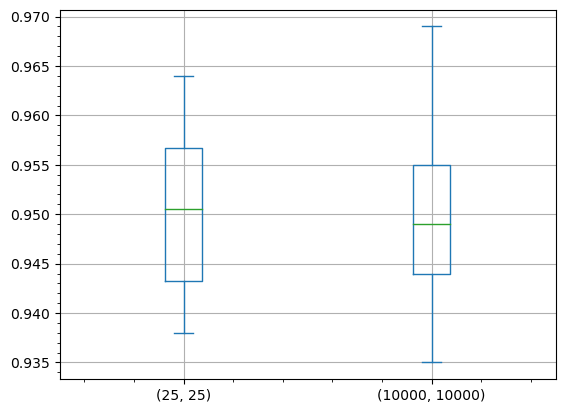

In [255]:
box_norm = pd.DataFrame({'(25, 25)':[], '(10000, 10000)':[]})
for i in range(50):
    count1 = count_diff_norm((n1, m1))
    count2 = count_diff_norm((n2, m2))
    box_norm.loc[len(box_norm.index)] = [count1 / gen_count, count2 / gen_count]
box_norm.plot.box()
plt.grid()
plt.minorticks_on()
plt.show()

Итак, среднее и при $25$, и при $10000$, практически не отличается, что подтверждает, что вероятность попадания в интервал не зависит от $n$ и $m$


## Задача 2

### Условие

Постройте асимптотический доверительный интервал уровня $1 - \alpha$ для указанного параметра. Проведите эксперимент по схеме, аналогичной первой задаче

Дано равномерное распределение
\begin{equation}
    U\left[-\theta,0\right]
\end{equation}
Параметр $\theta$, $\theta = 3$. Использовать предельную теорему об асимптотическом поведении крайних членов вариационного ряда

In [251]:
beta = 0.95
alpha = 1 - beta
n1 = 25
n2 = 10000
theta = 3
gen_count = 1000


### Решение

Функция распределения данного равномерного распределения
\begin{equation}
    F_\theta\left(x\right) = \frac{x+\theta}{\theta}, -\theta<x<0
\end{equation}
Используя предельную теорему об асимптотическом поведении крайних членов вариационного ряда
\begin{equation}
    nF\left(X_{(r)}\right) \xrightarrow{n\rightarrow\infty} \Gamma\left(r,1\right)
\end{equation}
и беря за $X_{(r)$ первый член вариационного рада (т.е $r = 1$) получаем
\begin{equation}
    n\frac{X_{(1)}+\theta}{\theta} \rightarrow \Gamma\left(1,1\right) = Exp(1)
\end{equation}
Значит, используемая статистка $G\left(X,\theta\right) = n\frac{X_{(1)}+\theta}{\theta}$ имеет экспоненциальное распределение с параметром $1$

Подставим в формулу асимптотического ДИ и выразим $\theta$
\begin{gather}
    P_\theta\left(q_{\alpha/2} < G\left(X,\theta\right) < q_{1-\alpha/2}\right) \rightarrow 1 - \alpha \\
    P_\theta\left(q_{\alpha/2} < n\frac{X_{(1)}+\theta}{\theta} < q_{1-\alpha/2}\right) \rightarrow 1 - \alpha \\
\end{gather}
Учитывая, что $X \sim [-\theta,0]$, то есть не положительна, то
\begin{gather}
    P_\theta\left(\frac{q_{1-\alpha/2}-n}{nX_{(1)}} < \frac{1}{\theta} < \frac{q_{\alpha/2}-n}{nX_{(1)}}\right) \rightarrow 1 - \alpha \\
    P_\theta\left(\frac{nX_{(1)}}{q_{\alpha/2}-n} < \theta < \frac{nX_{(1)}}{q_{1-\alpha/2}-n}\right) \rightarrow 1 - \alpha
\end{gather}

Тогда асимптотический ДИ уровня $1 - \alpha$ равен
\begin{equation}
    \theta \in \left[\frac{nX_{(1)}}{q_{\alpha/2}-n}, \frac{nX_{(1)}}{q_{1-\alpha/2}-n}\right]
\end{equation}


### Эксперимент


In [252]:
def count_diff_uniform(n):
    counter = 0
    for i in range(gen_count):
        gen_arr = scp.stats.uniform.rvs(loc=-theta, scale=theta, size=n)
        left = (n * gen_arr.min()) / (scp.stats.expon.ppf(alpha / 2) - n)
        right = (n * gen_arr.min()) / (scp.stats.expon.ppf(1 - (alpha / 2)) - n)
        if left <= theta <= right :
            counter += 1
    return counter

In [257]:
diff_cnt = pd.DataFrame({'gen_size':[], 'diff_count':[], 'percentage':[]})
gen_sizes = [25, 10000]
for gen_size in gen_sizes:
    count = count_diff_uniform(gen_size)
    diff_cnt.loc[len(diff_cnt.index)] = [gen_size, count, count/gen_count]
diff_cnt

,gen_size,diff_count,percentage
0,25.0,969.0,0.969
1,10000.0,952.0,0.952


При генерации было замечено, что вероятность накрытия параметра интервалом изменяется в зависимости от размеров выборки, что связано с использованием теоремы об асимптотическом поведении крайних членов вариационного ряда, которая становится тем точнее, чем больше объем используемой выборки. Поэтому построенный интервал и называется асимптотическим, так как $P_\theta \rightarrow 1 - \alpha$ при $n \rightarrow \infty$

Снова построю box-plot

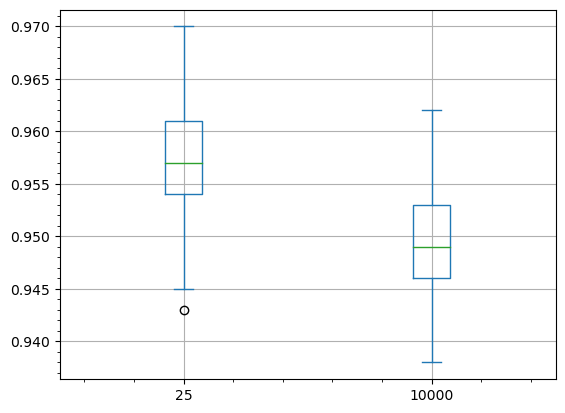

In [254]:
box_uniform = pd.DataFrame({'25':[], '10000':[]})
for i in range(50):
    count1 = count_diff_uniform(25)
    count2 = count_diff_uniform(10000)
    box_uniform.loc[len(box_uniform.index)] = [count1 / gen_count, count2 / gen_count]
box_uniform.plot.box()
plt.grid()
plt.minorticks_on()
plt.show()

Нетрудно заметить, что в данном случае средние значения вероятностей отличаются друг от друга сильнее, чем в случае точного ДИ, причем при размере выборки $10000$ среднее ближе к ожидаемому значению в $95$ процентов, что доказывает зависимость точности асимптотического ДИ от размера выборки